In [26]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

import sys 
sys.path.append("../")

from util import map_potentialness_to_bin, map_bin_to_potentialness
from evaluation.generate_plots_distribution import set_axis

# Parameter Experiments
PATH_TO_DATA = "/home/matthias/Git/MOberlechner/matrix_game_learning/projects/hodge/data/"
PATH_TO_RESULTS = "/home/matthias/Git/MOberlechner/matrix_game_learning/projects/hodge/results/"

# Parameter visualization
cmap = matplotlib.colormaps["RdBu"]
COLORS = [cmap(0.9), cmap(0.1)]
LS = ["solid", "dashed", "dashdot", "dotted"]

FONTSIZE_LABEL = 14
FONTSIZE_TITLE = 13
FONTSIZE_LEGEND = 13
FORMAT = "png"
DPI = 300

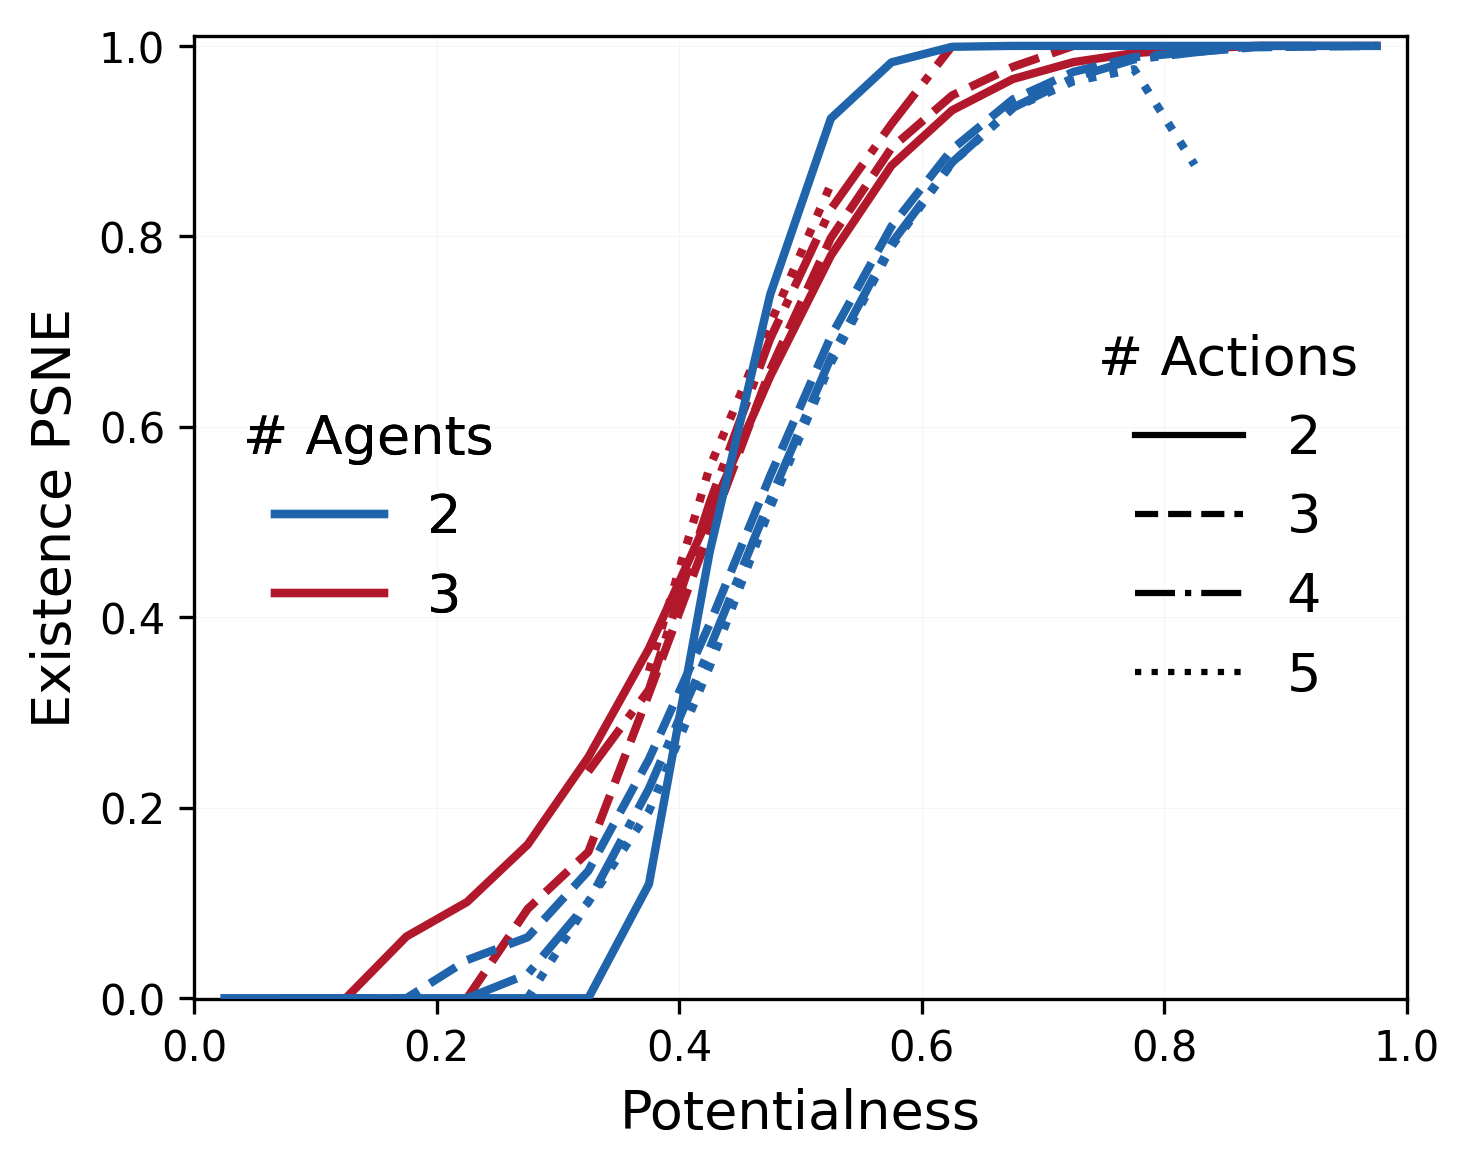

In [91]:
distribution = "uniform"
n_actions = 3
n_agents = 3
n_bins = 50

file_name = f"random_{distribution}_{[n_actions]*n_agents}.csv"
tmp = pd.read_csv(os.path.join(PATH_TO_DATA, "random", file_name))
bins = np.linspace(0, 1, n_bins+1)
tmp["bin"] = [(p>=bins).sum() for p in tmp.potentialness]

In [98]:
seeds = []
for bin in tmp.bin.unique():
    if sum(tmp.bin == bin) >= 20:
        seeds += list(
            np.random.choice(tmp.seed[tmp.bin==bin], replace=False, size=20))

In [91]:
n_actions = [4, 4]
n_bins = 100
distribution = "uniform"

# get distribution potentialness (large sample)
df = pd.read_csv(f"../data/random_{distribution}_{n_actions}.csv")
density, bins = np.histogram(df.potentialness, bins=n_bins, range=(0,1))

In [92]:
# get distribution of potentialness and convergence (small)
df_learning = pd.read_csv(f"../data/random_learning_{n_actions}.csv")
df_learning["bin"] = [(p>=bins).sum() for p in df_learning.potentialness]
df_learning = df_learning.groupby("bin").agg({"convergence":"sum", "game": "count"}).reset_index()

df = pd.merge(pd.DataFrame({"bin": list(range(1, n_bins+1))}), df_learning, on="bin", how="left")
df["convergence"] = df.convergence/df.game.sum()
df["game"] = df.game/df.game.sum()

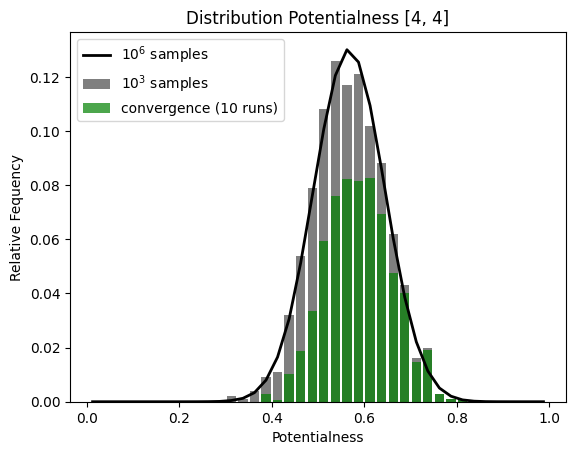

In [93]:

x = bins[:-1] + 0.5/n_bins

plt.plot(x, density/density.sum(), color="k", linewidth=2, label="$10^6$ samples")

plt.bar(x, df.game, width=0.8/n_bins, alpha=0.5, color="k", label="$10^3$ samples")
plt.bar(x, df.convergence, width=0.8/n_bins, color="g", alpha=0.7, label="convergence (10 runs)")

plt.title(f"Distribution Potentialness {n_actions}")
plt.xlabel("Potentialness")
plt.ylabel("Relative Fequency")
plt.legend(loc=2)
plt.show()

## Potentialness vs. Convergence

In [114]:
n_actions = [3, 3]
distribution="uniform"
df = pd.read_csv(f"../data/random_learning_{distribution}_{n_actions}.csv")
df = df.groupby("seed").agg({"convergence": "mean", "potentialness": "first"}).reset_index()

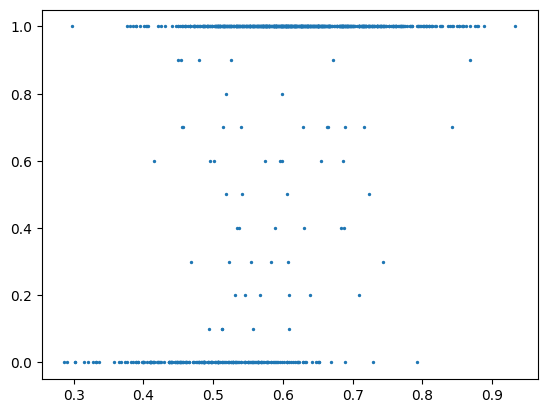

In [116]:
plt.scatter(df.potentialness, df.convergence, s = 2)

## Distribution Potentialness